# Fundamental Big Data - SDGs No. 13 tentang Climate Action
### Nama Anggota Kelompok 6 :
<li> Keisya (221402006) </li>
<li> Ceycylia Dear Amizafatel (221402059) </li>
<li> Diva Anggreini Harahap (221402094) </li>
<li> Sakifa Indira Putri (221402130) </li>


## 1. Pengenalan Dataset
Sumber dataset : [LINK](https://www.kaggle.com/datasets/alessandrolobello/agri-food-co2-emission-dataset-forecasting-ml) <br>
Dataset yang kami pilih bernama <b>Agri-food CO2 emission dataset - Forecasting ML</b>. <br>
<li>Dataset emisi CO2 sektor pertanian ini dibuat dengan menggabungkan dan memproses ulang sekitar selusin dataset individu dari Food and Agriculture Organization (FAO) dan data dari IPCC. Dataset ini menggambarkan emisi CO2 yang berkaitan dengan sektor agri-pangan, yang menyumbang sekitar 62% dari total emisi tahunan global. </li>
<li>Emisi dari sektor agri-pangan memiliki keterkaitan yang signifikan ketika mempelajari perubahan iklim. Dataset ini menunjukkan bahwa emisi dari sektor ini memberikan kontribusi yang substansial terhadap total emisi tahunan global. </li>
<li>Memahami dan menangani dampak lingkungan dari industri agri-pangan sangat penting untuk mengurangi perubahan iklim serta mengembangkan praktik berkelanjutan di sektor ini. </li>

Detail setiap kolom dari dataset : <br>
<li> Savanna fires: Emisi dari kebakaran di ekosistem savana. </li>
<li> Forest fires: Emisi dari kebakaran di area hutan. </li>
<li> Crop Residues: Emisi dari pembakaran atau dekomposisi sisa tanaman setelah panen. </li>
<li> Rice Cultivation: Emisi dari metana yang dilepaskan selama budidaya padi. </li>
<li> Drained organic soils (CO2): Emisi karbon dioksida yang dilepaskan saat pengeringan tanah organik. </li>
<li> Pesticides Manufacturing: Emisi dari produksi pestisida. </li>
<li> Food Transport: Emisi dari transportasi produk makanan. </li>
<li> Forestland: Lahan yang tertutup oleh hutan. </li>
<li> Net Forest conversion: Perubahan luas hutan akibat deforestasi dan reforestasi. </li>
<li> Food Household Consumption: Emisi dari konsumsi makanan di tingkat rumah tangga. </li>
<li> Food Retail: Emisi dari operasional toko ritel yang menjual makanan. </li>
<li> On-farm Electricity Use: Konsumsi listrik di pertanian. </li>
<li> Food Packaging: Emisi dari produksi dan pembuangan material kemasan makanan. </li>
<li> Agrifood Systems Waste Disposal: Emisi dari pembuangan limbah di sistem agri-pangan. </li>
<li> Food Processing: Emisi dari pengolahan produk makanan. </li>
<li> Fertilizers Manufacturing: Emisi dari produksi pupuk. </li>
<li> IPPU: Emisi dari proses industri dan penggunaan produk. </li>
<li> Manure applied to Soils: Emisi dari aplikasi kotoran hewan ke tanah pertanian. </li>
<li> Manure left on Pasture: Emisi dari kotoran hewan di padang rumput atau area penggembalaan. </li>
<li> Manure Management: Emisi dari pengelolaan dan pengolahan kotoran hewan. </li>
<li> Fires in organic soils: Emisi dari kebakaran di tanah organik. </li>
<li> Fires in humid tropical forests: Emisi dari kebakaran di hutan tropis basah. </li>
<li> On-farm energy use: Konsumsi energi di pertanian. </li>
<li> Rural population: Jumlah penduduk yang tinggal di daerah pedesaan. </li>
<li> Urban population: Jumlah penduduk yang tinggal di daerah perkotaan. </li>
<li> Total Population - Male: Total jumlah individu laki-laki dalam populasi. </li>
<li> Total Population - Female: Total jumlah individu perempuan dalam populasi. </li>
<li> total_emission: Total emisi gas rumah kaca dari berbagai sumber. </li>
<li> Average Temperature °C: Rata-rata kenaikan suhu tahunan dalam derajat Celsius. </li>

# 2. Import Library

In [1]:
# Melakukan import pada library pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score

# 3. Data Cleaning and Exploratory Data Analysis (EDA)

In [2]:
# Membaca dan menampilkan dataset kedalam dataframe
df = pd.read_csv('Agrofood_co2_emission.csv')
df

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [3]:
# Melakukan pengecekan apakah ada baris yang duplikat
df.duplicated().sum()

np.int64(0)

Output menunjukkan tidak ada data yang duplikat. Selanjutnya kita akan melakukan pengecekan jumlah nilai unik, apabila terdapat kolom yang hanya memiliki 1 unique value, maka lebih baik dihapus karena tidak memberikan pengaruh banyak dalam model machine learning yang akan dibuat.

In [4]:
# Menampilkan informasi dasar tentang setiap kolom dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [5]:
# Pengecekan total unique values pada semua kolom yang bertipe data int64
df.select_dtypes('int64').nunique()

Year    31
dtype: int64

Berdasarkan output, kolom Year memiliki 31 unique values, maka kolom tersebut tidak dihapus.

In [6]:
# Pengecekan total unique values pada semua kolom yang bertipe data float64
df.select_dtypes('float64').nunique()

Savanna fires                      3746
Forest fires                       2962
Crop Residues                      5358
Rice Cultivation                   3635
Drained organic soils (CO2)        2147
Pesticides Manufacturing           1310
Food Transport                     6512
Forestland                          605
Net Forest conversion               442
Food Household Consumption         6358
Food Retail                        6459
On-farm Electricity Use            5322
Food Packaging                     3704
Agrifood Systems Waste Disposal    6419
Food Processing                    3542
Fertilizers Manufacturing          2973
IPPU                               6026
Manure applied to Soils            5927
Manure left on Pasture             5922
Manure Management                  5931
Fires in organic soils              126
Fires in humid tropical forests    1736
On-farm energy use                 5558
Rural population                   6611
Urban population                   6865


Berdasarkan output, semua kolom yang bertipe data float64 memiliki unique values lebih dari 1, oleh karena itu tidak ada kolom yang perlu dihapus.

In [7]:
# Pengecekan total unique values pada semua kolom yang bertipe data object
df.select_dtypes('object').nunique()

Area    236
dtype: int64

Berdasarkan output diatas, kolom Area juga memiliki unique values lebih dari 1. Kesimpulannya, tidak ada kolom yang perlu dihapus karena memiliki value yang beragam.

In [8]:
# Mengecek apakah ada missing values
df.isna().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


Dari output diatas, terdapat 11 kolom yang memiliki missing values. Oleh karena itu, kita akan melakukan replace missing value dengan mean.

In [9]:
# Handling missing values dengan menggunakan nilai mean setiap kolom
df["Savanna fires"] = df["Savanna fires"].fillna(df["Savanna fires"].mean())
df["Forest fires"] = df["Forest fires"].fillna(df["Forest fires"].mean())
df["Crop Residues"] = df["Crop Residues"].fillna(df["Crop Residues"].mean())
df["Forestland"] = df["Forestland"].fillna(df["Forestland"].mean())
df["Net Forest conversion"] = df["Net Forest conversion"].fillna(df["Net Forest conversion"].mean())
df["Food Household Consumption"] = df["Food Household Consumption"].fillna(df["Food Household Consumption"].mean())
df["IPPU"] = df["IPPU"].fillna(df["IPPU"].mean())
df["Manure applied to Soils"] = df["Manure applied to Soils"].fillna(df["Manure applied to Soils"].mean())
df["Manure Management"] = df["Manure Management"].fillna(df["Manure Management"].mean())
df["Fires in humid tropical forests"] = df["Fires in humid tropical forests"].fillna(df["Fires in humid tropical forests"].mean())
df["On-farm energy use"] = df["On-farm energy use"].fillna(df["On-farm energy use"].mean())

In [10]:
# Mengecek kembali apakah ada missing values
df.isna().sum()

Area                               0
Year                               0
Savanna fires                      0
Forest fires                       0
Crop Residues                      0
Rice Cultivation                   0
Drained organic soils (CO2)        0
Pesticides Manufacturing           0
Food Transport                     0
Forestland                         0
Net Forest conversion              0
Food Household Consumption         0
Food Retail                        0
On-farm Electricity Use            0
Food Packaging                     0
Agrifood Systems Waste Disposal    0
Food Processing                    0
Fertilizers Manufacturing          0
IPPU                               0
Manure applied to Soils            0
Manure left on Pasture             0
Manure Management                  0
Fires in organic soils             0
Fires in humid tropical forests    0
On-farm energy use                 0
Rural population                   0
Urban population                   0
T

Dapat dilihat, semua kolom sudah tidak memiliki missing values. Selanjutnya, kita akan melakukan encoding pada kolom Area karena masih bertipe kategorikal.

### Encoding

In [11]:
# Data sudah di-load dalam DataFrame df
categorical_features = ['Area']
mappings = {}

for feature in categorical_features:
    le = LabelEncoder()
    df[feature + '_encoded'] = le.fit_transform(df[feature])
    
    # Simpan mapping nilai asli dan encoding untuk fitur saat ini
    mappings[feature] = dict(zip(le.classes_, le.transform(le.classes_)))

# Tampilkan mapping untuk setiap fitur
for feature, mapping in mappings.items():
    print(f"Mapping antara nilai asli dan encoding untuk '{feature}':")
    for original, encoded in mapping.items():
        print(f"  {original} -> {encoded}")

Mapping antara nilai asli dan encoding untuk 'Area':
  Afghanistan -> 0
  Albania -> 1
  Algeria -> 2
  American Samoa -> 3
  Andorra -> 4
  Angola -> 5
  Anguilla -> 6
  Antigua and Barbuda -> 7
  Argentina -> 8
  Armenia -> 9
  Aruba -> 10
  Australia -> 11
  Austria -> 12
  Azerbaijan -> 13
  Bahamas -> 14
  Bahrain -> 15
  Bangladesh -> 16
  Barbados -> 17
  Belarus -> 18
  Belgium -> 19
  Belgium-Luxembourg -> 20
  Belize -> 21
  Benin -> 22
  Bermuda -> 23
  Bhutan -> 24
  Bolivia (Plurinational State of) -> 25
  Bosnia and Herzegovina -> 26
  Botswana -> 27
  Brazil -> 28
  British Virgin Islands -> 29
  Brunei Darussalam -> 30
  Bulgaria -> 31
  Burkina Faso -> 32
  Burundi -> 33
  Cabo Verde -> 34
  Cambodia -> 35
  Cameroon -> 36
  Canada -> 37
  Cayman Islands -> 38
  Central African Republic -> 39
  Chad -> 40
  Channel Islands -> 41
  Chile -> 42
  China -> 43
  China, Hong Kong SAR -> 44
  China, Macao SAR -> 45
  China, Taiwan Province of -> 46
  China, mainland -> 47
  

In [12]:
# Mengecek apakah kolom Area berhasil di encoding
df

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C,Area_encoded
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,0.0,0.0,3008.982252,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167,0
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,0.0,0.0,3008.982252,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667,0
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,0.0,0.0,3008.982252,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583,0
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,0.0,0.0,3008.982252,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917,0
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,0.0,0.0,3008.982252,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,0.0,0.0,417.315000,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250,235
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,0.0,0.0,398.164400,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500,235
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,0.0,0.0,465.773500,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333,235
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,0.0,0.0,444.233500,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667,235


In [13]:
# Menghapus kolom yang belum di encoding.
df.drop('Area',axis=1, inplace=True)
df

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C,Area_encoded
0,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,0.0000,...,0.0,0.0,3008.982252,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167,0
1,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,0.0000,...,0.0,0.0,3008.982252,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667,0
2,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,0.0000,...,0.0,0.0,3008.982252,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583,0
3,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,0.0000,...,0.0,0.0,3008.982252,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917,0
4,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,0.0000,...,0.0,0.0,3008.982252,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,...,0.0,0.0,417.315000,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250,235
6961,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,...,0.0,0.0,398.164400,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500,235
6962,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,...,0.0,0.0,465.773500,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333,235
6963,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,...,0.0,0.0,444.233500,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667,235


### Handling Outliers

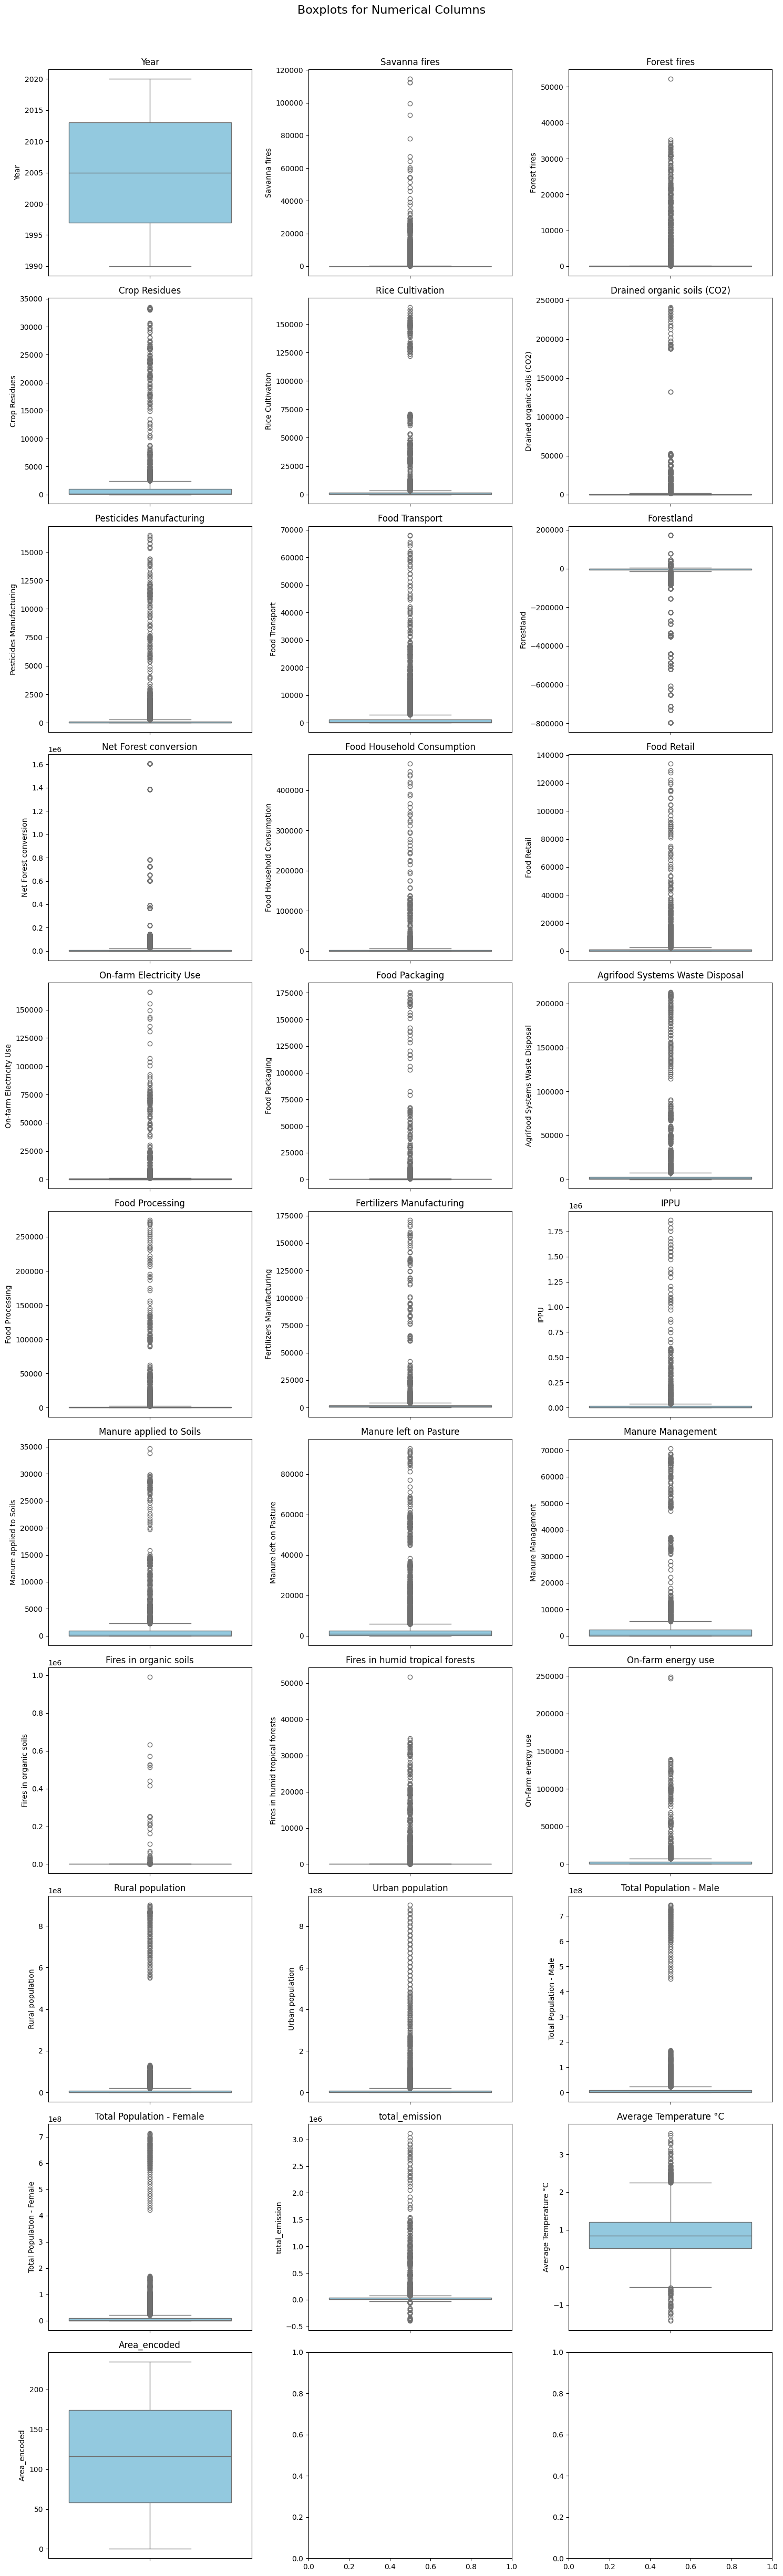

In [14]:
# Mengecek outliers menggunakan boxplot untuk numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(len(numerical_columns) // 3 + 1, 3, figsize=(15, 50))
fig.suptitle('Boxplots for Numerical Columns', fontsize=16)
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.boxplot(df[column], ax=axes[i], color='skyblue')
    axes[i].set_title(column)
    axes[i].set_xlabel('')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Meskipun terdapat beberapa kolom memiliki outliers berdasarkan boxplot diatas, kami tidak melakukan teknik untuk menghandle outliers tersebut. Alasannya karena setelah kami memahami setiap kolom, nilai yang dianggap outliers masih memungkinkan (masuk akal). Contoh outliers yang dianggap tidak mungkin adalah kolom umur seseorang yang memiliki value > 200.

### Data Formatting

In [15]:
df.dtypes

Year                                 int64
Savanna fires                      float64
Forest fires                       float64
Crop Residues                      float64
Rice Cultivation                   float64
Drained organic soils (CO2)        float64
Pesticides Manufacturing           float64
Food Transport                     float64
Forestland                         float64
Net Forest conversion              float64
Food Household Consumption         float64
Food Retail                        float64
On-farm Electricity Use            float64
Food Packaging                     float64
Agrifood Systems Waste Disposal    float64
Food Processing                    float64
Fertilizers Manufacturing          float64
IPPU                               float64
Manure applied to Soils            float64
Manure left on Pasture             float64
Manure Management                  float64
Fires in organic soils             float64
Fires in humid tropical forests    float64
On-farm ene

Selanjutnya, dapat kita lihat tipe data Year berupa float64, akan lebih tepat jika diubah menjadi int64 karena tidak ada tahun yang merupakan bilangan desimal.

In [16]:
#Karena Year masih bertipe data float, maka kita ubah menjadi int
df["Year"] = df["Year"].astype("int64")

#Mengecek kembali apakah price sudah menjadi int tipe datanya
df.dtypes

Year                                 int64
Savanna fires                      float64
Forest fires                       float64
Crop Residues                      float64
Rice Cultivation                   float64
Drained organic soils (CO2)        float64
Pesticides Manufacturing           float64
Food Transport                     float64
Forestland                         float64
Net Forest conversion              float64
Food Household Consumption         float64
Food Retail                        float64
On-farm Electricity Use            float64
Food Packaging                     float64
Agrifood Systems Waste Disposal    float64
Food Processing                    float64
Fertilizers Manufacturing          float64
IPPU                               float64
Manure applied to Soils            float64
Manure left on Pasture             float64
Manure Management                  float64
Fires in organic soils             float64
Fires in humid tropical forests    float64
On-farm ene

### Correlation Map

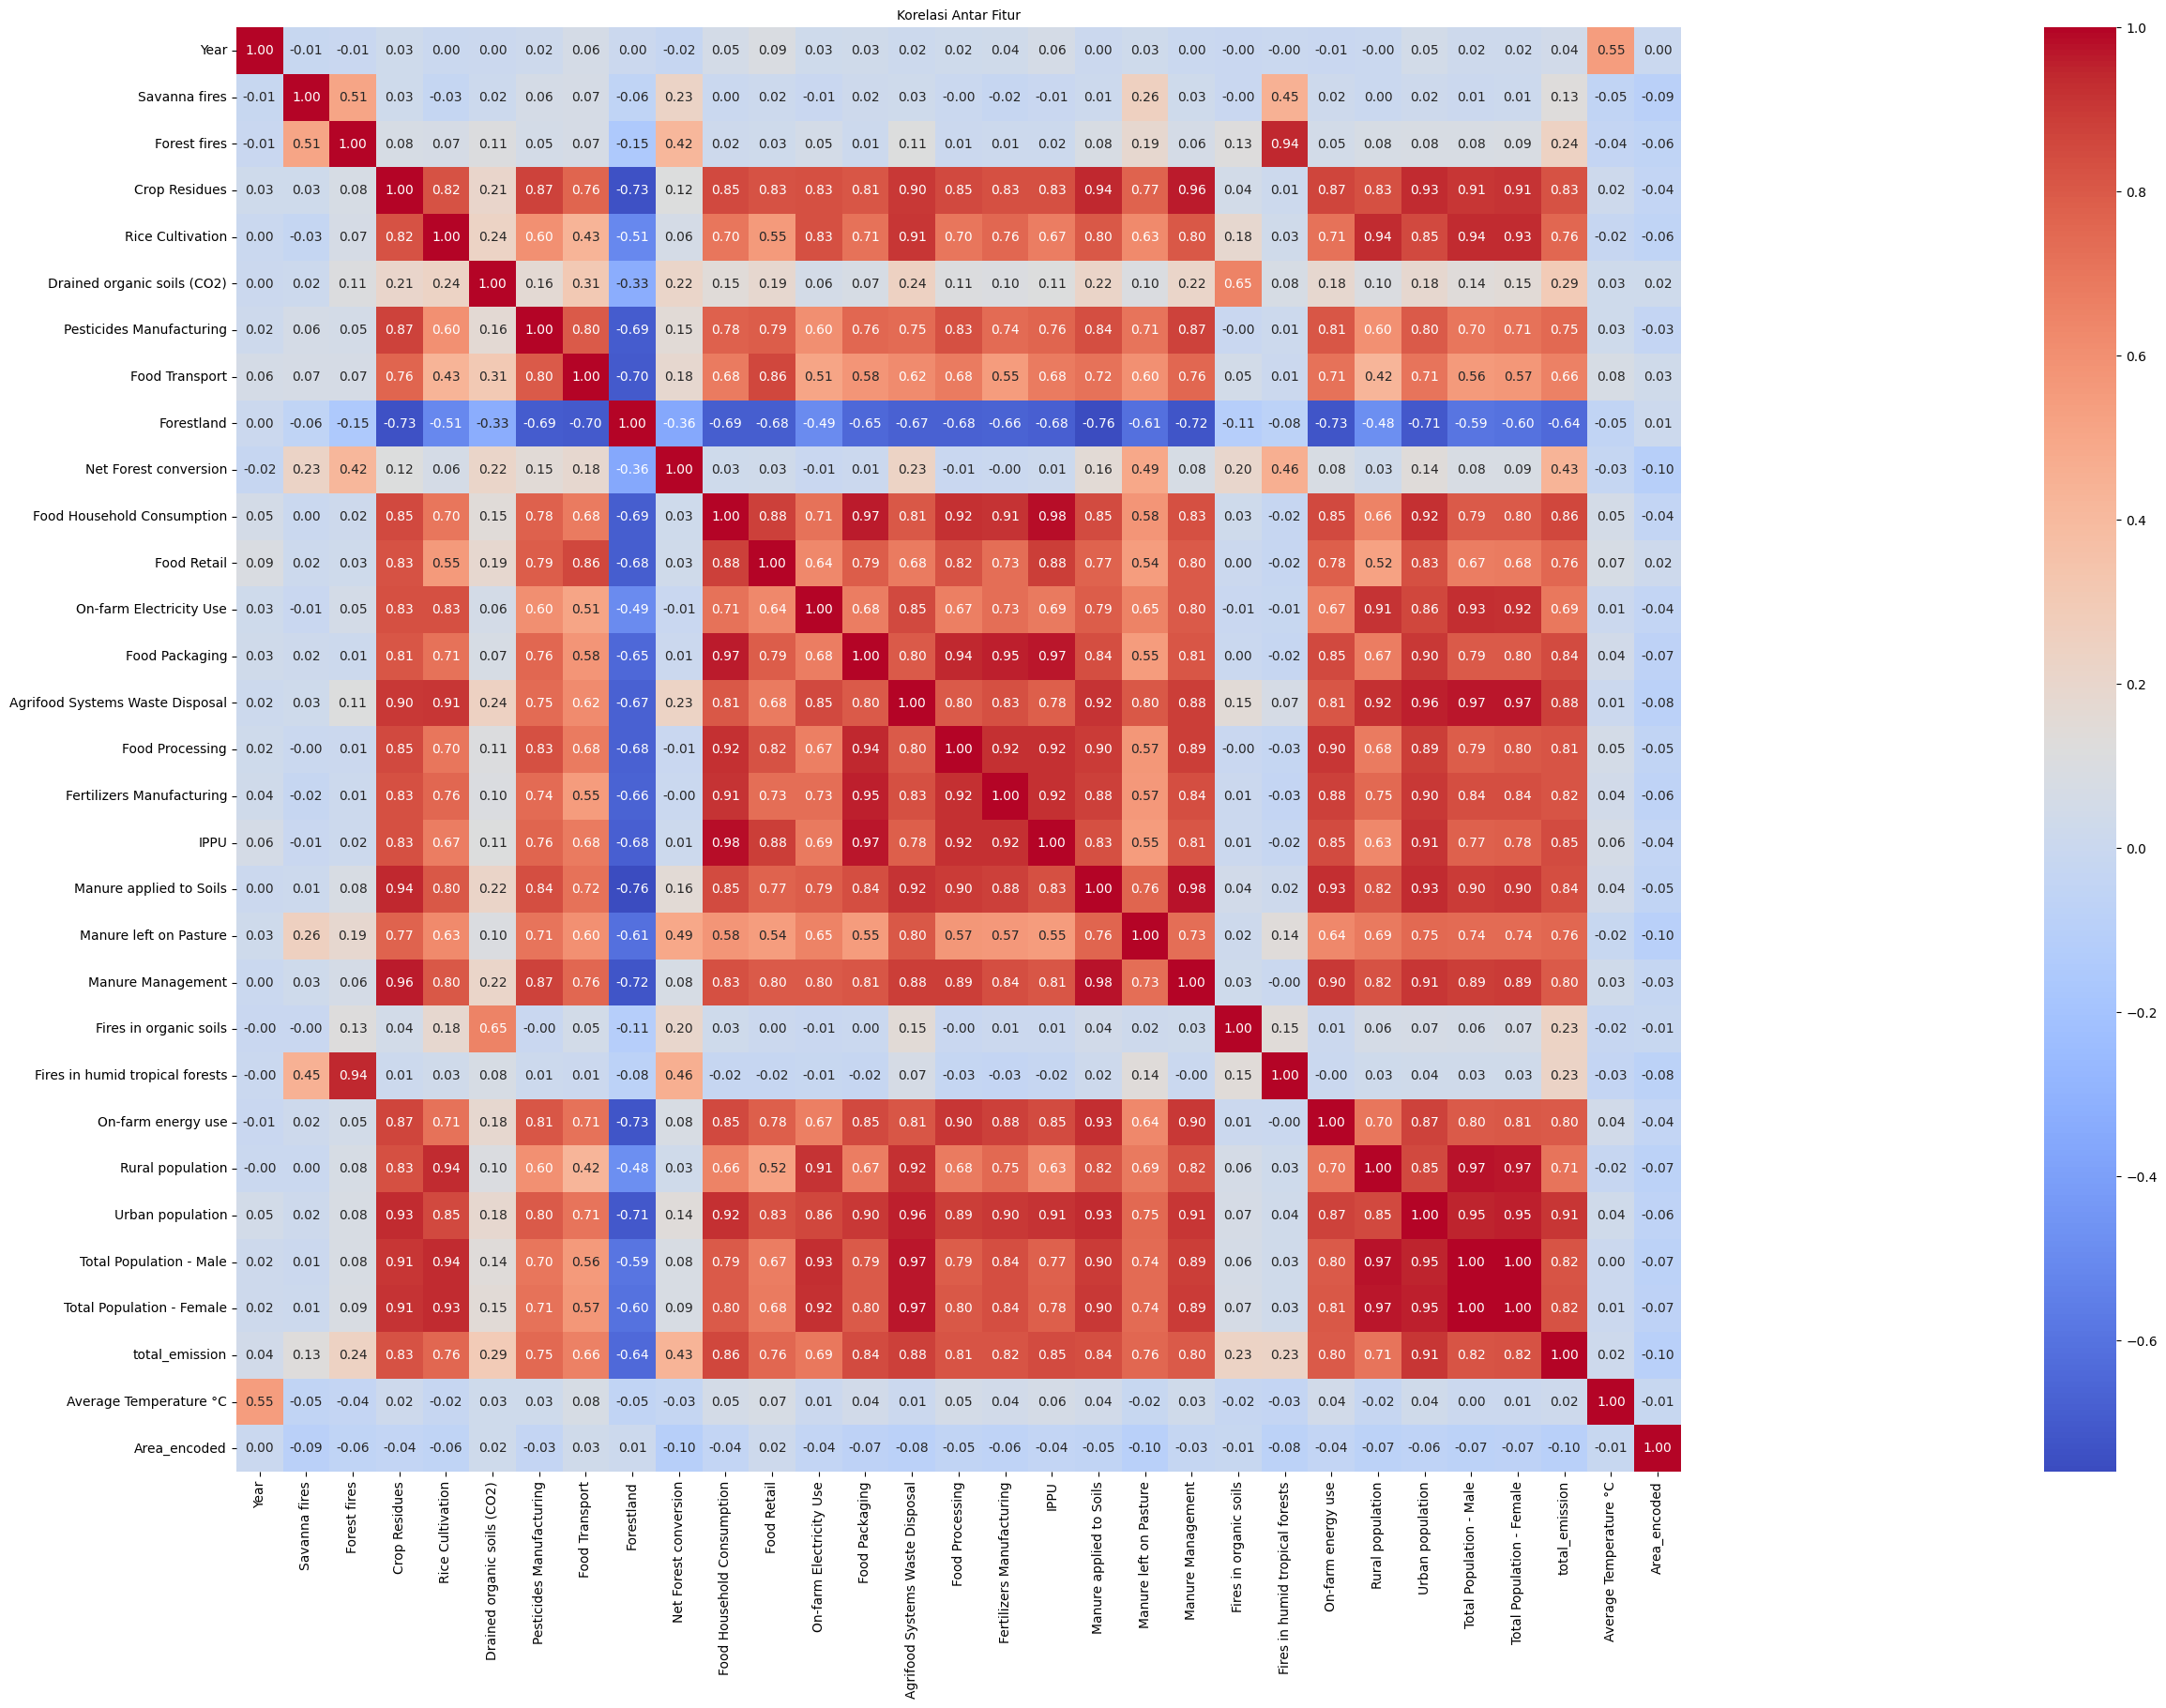

In [17]:
# Plot correlation heatmap
plt.figure(figsize=(100, 20))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Korelasi Antar Fitur', fontsize=10)
plt.show()

### Feature Selection

In [18]:
# Menghapus kolom yang memiliki korelasi lemah
df.drop('Savanna fires',axis=1, inplace=True)
df.drop('Fires in humid tropical forests',axis=1, inplace=True)
df.drop('Forest fires',axis=1, inplace=True)
df.drop('Net Forest conversion',axis=1, inplace=True)
df.drop('Drained organic soils (CO2)',axis=1, inplace=True)
df.drop('Fires in organic soils',axis=1, inplace=True)


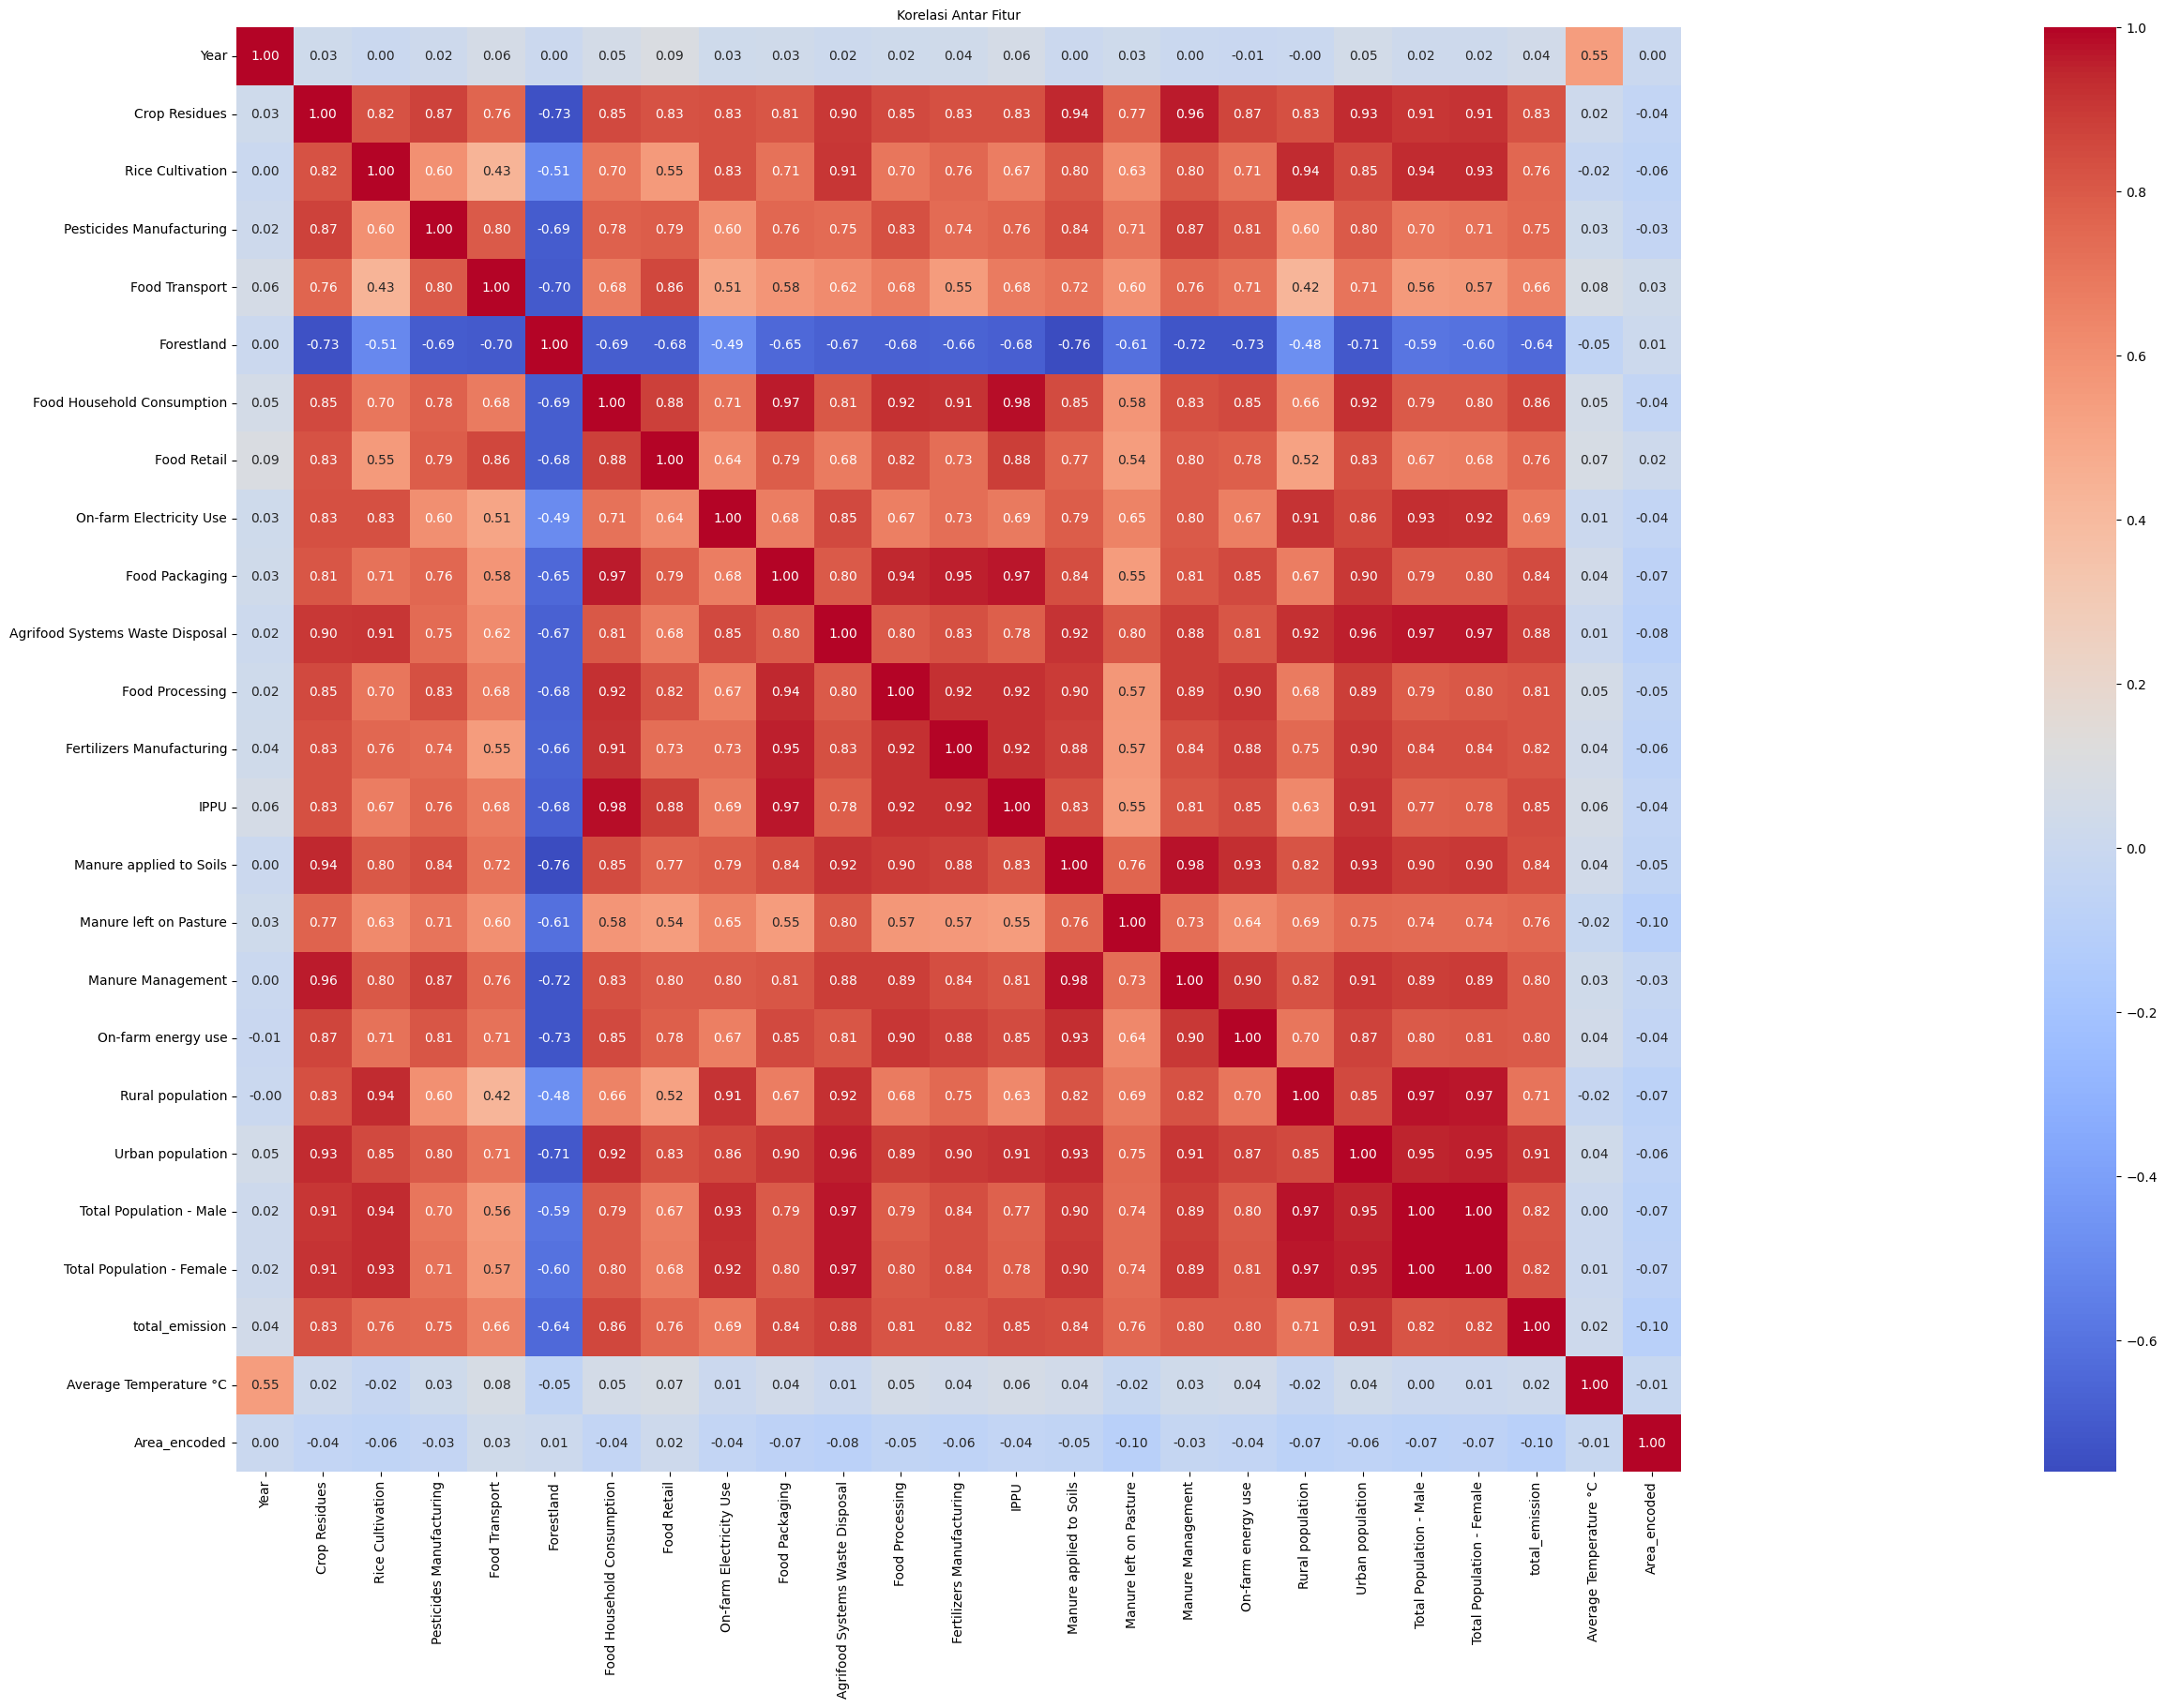

In [19]:
# Plot correlation heatmap
plt.figure(figsize=(100, 20))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Korelasi Antar Fitur', fontsize=10)
plt.show()

### Data Normalization

In [20]:
# Memilih kolom numerik untuk normalisasi
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
data_normalized = df.copy()
data_normalized[numerical_columns] = scaler.fit_transform(df[numerical_columns])
data_normalized

,Year,Crop Residues,Rice Cultivation,Pesticides Manufacturing,Food Transport,Forestland,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,...,Manure left on Pasture,Manure Management,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C,Area_encoded
0,0.000000,0.006139,0.004160,0.000717,0.000929,0.820811,0.000170,0.000820,0.000086,0.000385,...,0.017171,0.004515,0.012090,0.010727,0.002876,0.007192,0.007495,0.112370,0.392447,0.0
1,0.033333,0.006255,0.004112,0.000712,0.000901,0.820811,0.000173,0.000872,0.000069,0.000385,...,0.017891,0.004843,0.012090,0.011366,0.003063,0.007225,0.007531,0.112406,0.288807,0.0
2,0.066667,0.005868,0.004160,0.000712,0.000785,0.820811,0.000173,0.000943,0.000056,0.000385,...,0.017851,0.004939,0.012090,0.012216,0.003310,0.008107,0.008451,0.112415,0.232463,0.0
3,0.100000,0.006892,0.004160,0.000712,0.000800,0.820811,0.000182,0.000609,0.000055,0.000385,...,0.017737,0.004984,0.012090,0.013174,0.003588,0.009418,0.009813,0.112419,0.305142,0.0
4,0.133333,0.007227,0.004279,0.000712,0.000795,0.820811,0.000190,0.000676,0.000051,0.000385,...,0.018238,0.005202,0.012090,0.014099,0.003861,0.010400,0.010825,0.112457,0.359492,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,0.866667,0.002118,0.000045,0.004557,0.003696,0.902282,0.000539,0.003312,0.002586,0.000130,...,0.029376,0.003997,0.001677,0.012148,0.005782,0.009140,0.010732,0.139828,0.509877,1.0
6961,0.900000,0.003244,0.000048,0.004071,0.003765,0.902282,0.000436,0.003329,0.001840,0.000108,...,0.029632,0.003615,0.001600,0.012444,0.005907,0.009334,0.010949,0.139448,0.294000,1.0
6962,0.933333,0.003284,0.000049,0.004010,0.004814,0.902282,0.000453,0.003684,0.002094,0.000108,...,0.030121,0.003638,0.001871,0.012738,0.006039,0.009529,0.011167,0.139593,0.388460,1.0
6963,0.966667,0.001357,0.000047,0.004435,0.004271,0.902282,0.000490,0.004056,0.002114,0.000102,...,0.030538,0.003784,0.001785,0.013027,0.006176,0.009725,0.011386,0.139969,0.482819,1.0


# 4. Pembuatan Model dengan Target Kolom 'Average Temperature °C' beserta Hyperparameter Tuning

##### 1. Random Forest Tuning

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

In [22]:
# Menentukan variabel x dan y pada modelling (pada variabel x, kolom price dihapus karena price akan menjadi variabel y (target)
X2 = data_normalized.drop(['Average Temperature °C'], axis=1)
y2 = data_normalized["Average Temperature °C"]

Berikut adalah kode untuk membagi dataset menjadi 80% data training dan 20% data testing.

In [23]:
# train test split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2,test_size = 0.2, random_state=42)

Selanjutnya, membuat instance model Random Forest dengan parameter default. Model dilatih menggunakan dataset training (X_train, y_train), lalu model digunakan untuk memprediksi target (y_test) berdasarkan dataset testing (X_test). Dilanjutkan dengan menghitung RMSE dari prediksi (base_pred) dan target sebenarnya (y_test), serta mengukur seberapa baik prediksi model menjelaskan variabilitas target (y_test).

In [24]:
base_model = RandomForestRegressor()
base_model.fit(X_train_2, y_train_2)
base_pred = base_model.predict(X_test_2)
base_rmse = np.sqrt(mse(y_test_2, base_pred))
print('Base Model has RMSE:', base_rmse)
print('Base Model has R2-Score:', r2_score(y_test_2, base_pred))

Base Model has RMSE: 0.06900326163858583
Base Model has R2-Score: 0.6157569912053775


##### <li> Randomized Search</li>

Pertama, dimulai dengan membuat grid parameter secara acak yang akan digunakan untuk hyperparameter tuning pada model Random Forest menggunakan RandomizedSearchCV.

In [25]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split, 'sqrt' = akar kuadrat dari total fitur
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


Setelah itu, dilakukan hyperparameter tuning pada model Random Forest Regressor menggunakan RandomizedSearchCV : <br>
<li>estimator=rf: Model yang akan di-tuning adalah Random Forest Regressor. </li>
<li>param_distributions=random_grid: Grid parameter yang akan diuji, didefinisikan sebelumnya dalam variabel random_grid. </li>
<li>n_iter=100: Menguji 100 kombinasi parameter yang dipilih secara acak dari grid. </li>
<li>cv=5: Menggunakan 5-fold cross-validation untuk mengevaluasi performa setiap kombinasi parameter. </li>
<li>verbose=3: Menampilkan proses pencarian parameter di konsol secara mendetail. </li>
<li>random_state=42: Menetapkan seed untuk memastikan hasil pencarian parameter konsisten (reproducible). </li>
<li>n_jobs=-1: Menggunakan semua core CPU yang tersedia untuk mempercepat proses pencarian. </li>
<li>return_train_score=True: Mengembalikan skor performa model pada data training selain data validasi. </li>

In [26]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, cv = 5, verbose=3, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train_2, y_train_2)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, return_train_score=True, verbose=3)

Setelah proses pencarian selesai dengan RandomizedSearchCV, atribut ini menyimpan dictionary yang berisi kombinasi parameter terbaik.

In [27]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20}

Menggunakan parameter terbaik untuk prediksi.

In [28]:
new_pred = rf_random.best_estimator_.predict(X_test_2)
new_rmse = np.sqrt(mse(y_test_2, new_pred))
print('New Model has RMSE:', new_rmse)
print('New Model has R2-Score:', r2_score(y_test_2, new_pred))

New Model has RMSE: 0.07156004253658758
New Model has R2-Score: 0.5867547068733139


In [29]:
print('Improvement of:', ((base_rmse - new_rmse)/base_rmse)*100,'%')

Improvement of: -3.705304412120757 %


##### <li> Grid Search </li>

Dimulai dengan melakukan pencarian hyperparameter secara sistematis menggunakan Grid Search pada model Random Forest Regressor :<br>
<li>'max_depth': Menentukan kedalaman maksimum pohon keputusan dalam Random Forest. Nilai yang diuji: 2, 5, 10. </li>
<li>'min_samples_leaf': Menentukan jumlah minimum sampel yang dibutuhkan di setiap daun pohon. Nilai yang diuji: 5, 50, 100. </li>
<li>'n_estimators': Menentukan jumlah pohon dalam Random Forest. Nilai yang diuji: 10, 50, 200. </li>

In [30]:
from sklearn.model_selection import GridSearchCV

grid_search_params = {
    'max_depth': [2,5,10],
    'min_samples_leaf': [5,50,100],
    'n_estimators': [10,50,200]
}

# Instantiate the grid search model
rf_grid = GridSearchCV(estimator=rf, param_grid=grid_search_params,
                            cv = 5, n_jobs=-1, verbose=3, return_train_score=True)

rf_grid.fit(X_train_2, y_train_2)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10],
                         'min_samples_leaf': [5, 50, 100],
                         'n_estimators': [10, 50, 200]},
             return_train_score=True, verbose=3)

Setelah proses pencarian selesai dengan GridSearchCV, atribut ini menyimpan dictionary yang berisi kombinasi parameter terbaik.

In [31]:
rf_grid.best_params_

{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 200}

Menggunakan parameter terbaik untuk prediksi.

In [32]:
new_pred_grid = rf_grid.best_estimator_.predict(X_test_2)

new_rmse_grid = np.sqrt(mse(y_test_2, new_pred_grid))

print('New Model has RMSE:', new_rmse_grid)
print('New Model has R2-Score:', r2_score(y_test_2, new_pred_grid))

New Model has RMSE: 0.07050730064946815
New Model has R2-Score: 0.5988240295256964


In [33]:
print('Improvement of:', ((base_rmse - new_rmse_grid)/base_rmse)*100,'%')

Improvement of: -2.179663649466216 %


##### 2. XGBoost

In [34]:
from xgboost import XGBRegressor 
from sklearn.model_selection import train_test_split, GridSearchCV  
import numpy as np 

# 3. Baseline Model: XGBoost dengan Default Parameters
print("Training Baseline Model...")
baseline_xgb = XGBRegressor(objective='reg:squarederror', random_state=42)  # Inisialisasi model XGBoost
baseline_xgb.fit(X_train_2, y_train_2)  # Latih model menggunakan data training
y_pred_baseline = baseline_xgb.predict(X_test_2)  # Prediksi pada data testing

# Evaluasi performa baseline model
baseline_rmse = np.sqrt(mse(y_test_2, y_pred_baseline))  # Hitung RMSE untuk baseline
baseline_r2 = r2_score(y_test_2, y_pred_baseline)  # Hitung R² Score untuk baseline
print(f"Baseline RMSE: {baseline_rmse:.4f}")  # Tampilkan RMSE
print(f"Baseline R2 Score: {baseline_r2:.4f}")  # Tampilkan R² Score

# 4. Model dengan Hyperparameter Tuning
print("\nTraining Tuned Model...")
# Hyperparameters yang akan di-tuning
xgb_params = {
    'n_estimators': [100, 200],   # Jumlah pohon dalam boosting
    'max_depth': [3, 5, 7],       # Kedalaman maksimum setiap pohon
    'learning_rate': [0.01, 0.1]  # Tingkat learning rate (pengaturan bobot per iterasi)
}

# GridSearchCV untuk mencari kombinasi hyperparameters terbaik
xgb_grid = GridSearchCV(
    XGBRegressor(objective='reg:squarederror', random_state=42),  # Model XGBoost
    xgb_params,  # Hyperparameters yang diuji
    scoring='r2',  # Menggunakan R² Score untuk evaluasi performa
    cv=5,  # Cross-validation 5-fold
    n_jobs=-1  # Menggunakan semua core CPU untuk komputasi
)

xgb_grid.fit(X_train_2, y_train_2)  # Latih model dan cari kombinasi terbaik hyperparameters

# Ambil model terbaik dari hasil tuning
xgb_best = xgb_grid.best_estimator_  # Model dengan kombinasi hyperparameters terbaik

# Prediksi pada data testing dengan model terbaik
y_pred_tuned = xgb_best.predict(X_test_2)

# Evaluasi performa model setelah tuning
tuned_rmse = np.sqrt(mse(y_test_2, y_pred_tuned))  # Hitung RMSE untuk tuned model
tuned_r2 = r2_score(y_test_2, y_pred_tuned)  # Hitung R² Score untuk tuned model

# 5. Hitung Improvement
improvement = ((baseline_rmse - tuned_rmse) / baseline_rmse) * 100
# Menghitung persentase peningkatan performa berdasarkan penurunan RMSE

# 6. Tampilkan Hasil
print("\nXGBoost Regressor - Tuned Model")
print("Best Hyperparameters:", xgb_grid.best_params_)  # Tampilkan hyperparameters terbaik
print(f"Tuned RMSE: {tuned_rmse:.4f}")  # RMSE setelah tuning
print(f"Tuned R2 Score: {tuned_r2:.4f}")  # R² Score setelah tuning
print(f"Improvement of RMSE: {improvement:.2f}%")  # Persentase perbaikan performa

Training Baseline Model...
Baseline RMSE: 0.0687
Baseline R2 Score: 0.6196

Training Tuned Model...


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

## Hasil Pemodelan setelah dilakukan Hyperparameter Tuning

<li> Random Forest</li>
<ul> Randomized Search, R2 score : 0.5891</ul> 
<ul> Grid Search, R2 score : 0.5988</ul>
<ul></ul>
<li> XGBoost, R2 score : 0.6404</li>
<br>
Kesimpulan : Algoritma dengan akurasi tertinggi adalah XGBoost. Akurasi yang didapat hanya sekitar 64% dikarenakan kolom target yaitu 'Average Temperature °C', cenderung tidak memiliki korelasi yang sangat kuat dengan kolom lainnya pada dataset. Hal ini menandakan adanya kemungkinan faktor lain yang mempengaruhi Average Temperature diluar dari faktor yang ada dalam dataset.

# 5. Visualisasi Data

#### 1. Rata - Rata Kenaikan Suhu di Tiap Area

In [38]:
# Menghitung rata-rata temperatur untuk setiap area
average_temperature = df.groupby('Area_encoded')['Average Temperature °C'].mean().reset_index()

# Membuat barplot
plt.figure(figsize=(120, 50))
sns.barplot(x='Area_encoded', y='Average Temperature °C', data=average_temperature, hue='Area_encoded', palette='viridis', legend = False)
plt.title('Rata-rata Kenaikan Temperatur di Setiap Area', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Rata-rata Temperatur (°C)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Barplot ini digunakan untuk melihat Area dengan rata - rata kenaikan temperatur per tahun. Dapat dilihat bahwa rata - rata kenaikan temperatur tertinggi ada di Area 139, yaitu Montenegro . Dan rata - rata kenaikan temperatur tertinggi ada di Area 136.0 yaitu Micronesia (Federated States of).

#### 2.Histogram untuk Distribusi Suhu Rata-Rata (°C)

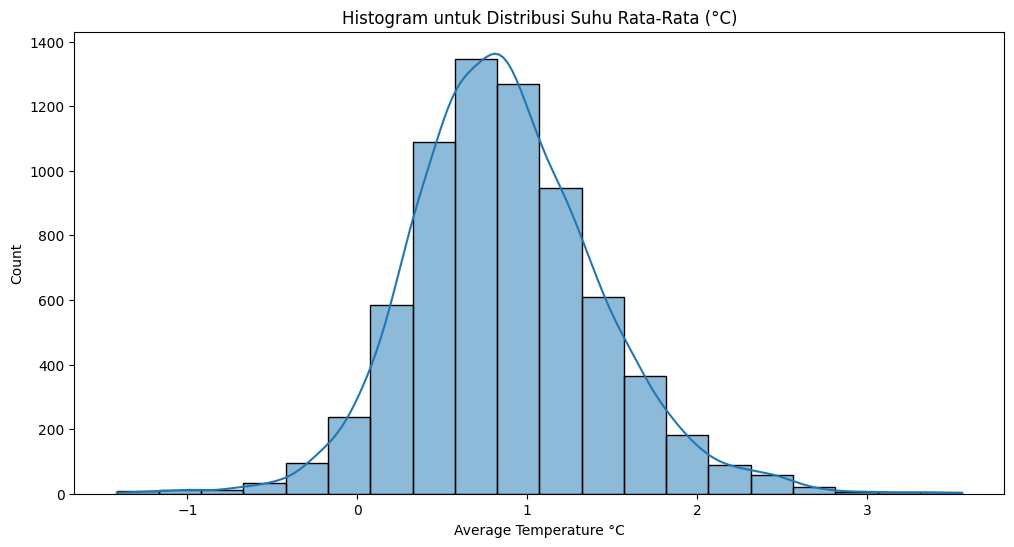

In [39]:
fig = plt.figure(figsize=(12, 6))
sns.histplot(df['Average Temperature °C'], kde=True, bins=20)  # Ganti dengan kolom yang relevan
plt.title('Histogram untuk Distribusi Suhu Rata-Rata (°C)')
plt.show()


Histogram ini menunjukkan distribusi dari suhu rata-rata (Average Temperature °C). Histogram ini juga dilengkapi dengan KDE untuk memberikan gambaran lebih halus mengenai pola distribusinya.

#### 3. Perubahan Suhu Rata-Rata (°C) dari Tahun ke Tahun

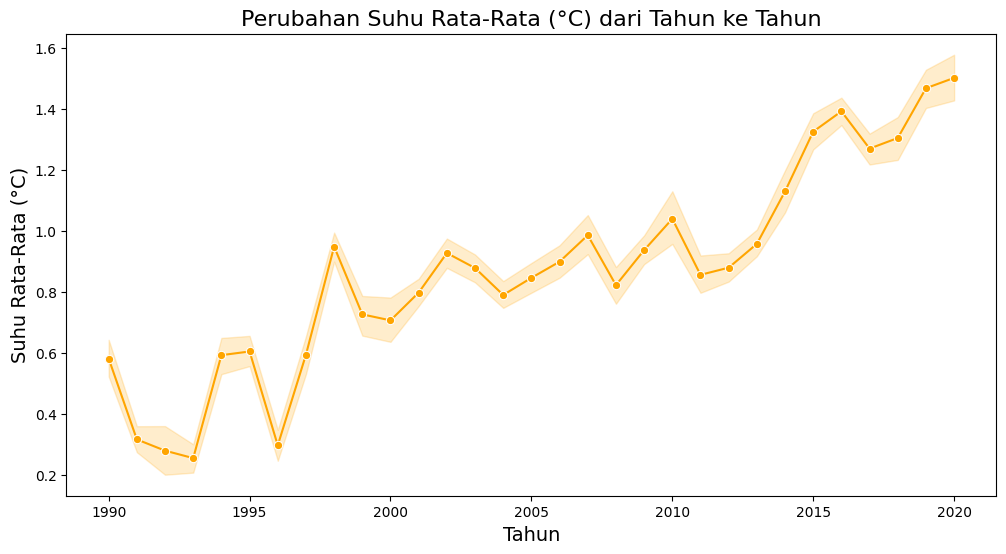

In [37]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Average Temperature °C', marker='o', color='orange')
plt.title('Perubahan Suhu Rata-Rata (°C) dari Tahun ke Tahun', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Suhu Rata-Rata (°C)', fontsize=14)
plt.show()


Berdasarkan grafik diatas, dapat disimpulkan bahwa terdapat tren peningkatan perubahan suhu rata-rata dari tahun ke tahun. Meskipun terdapat fluktuasi kecil pada beberapa tahun, garis tren keseluruhan menunjukkan kecenderungan kenaikan suhu. Seiring berjalannya waktu, laju peningkatan suhu rata-rata tampaknya semakin cepat, terutama pada dekade-dekade terakhir. Hal ini mengindikasikan adanya percepatan dalam perubahan iklim.

#### 4. Pengaruh total emisi terhadap rata-rata temperatur pertahun

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20208\787045753.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  average_temperature_per_emission = df.groupby('Year').apply(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20208\787045753.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


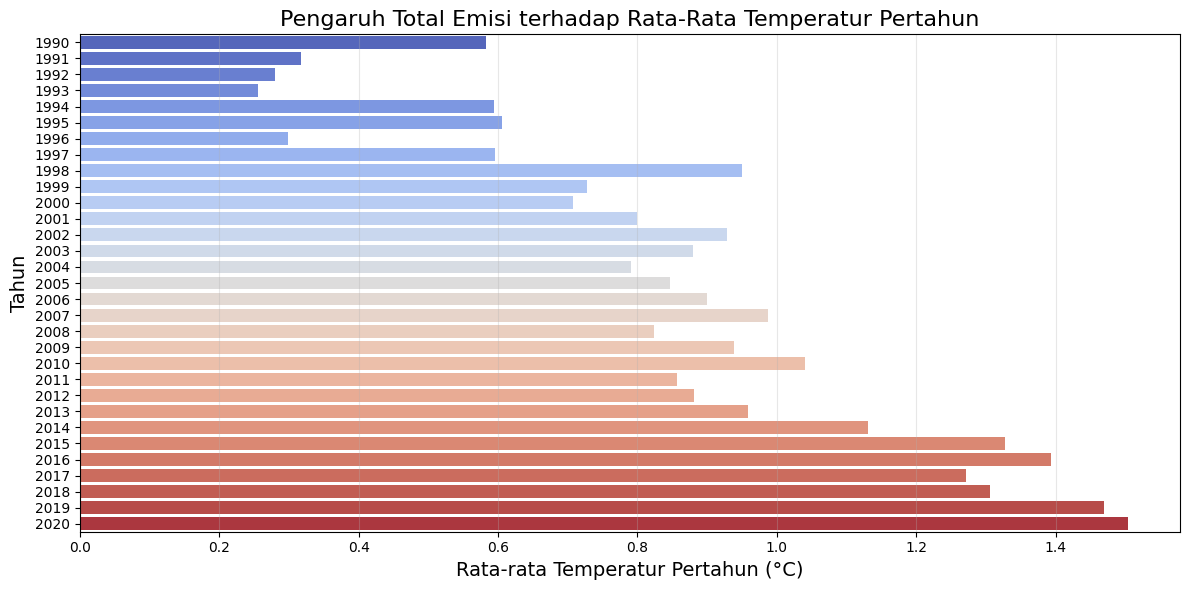

In [54]:
average_temperature_per_emission = df.groupby('Year').apply(
    lambda x: x['Average Temperature \u00b0C'].mean()
).reset_index(name='Average Temperature')

plt.figure(figsize=(12, 6))
sns.barplot(
    x=average_temperature_per_emission['Average Temperature'], 
    y=average_temperature_per_emission['Year'], 
    palette='coolwarm', 
    orient='h'
)
plt.title('Pengaruh Total Emisi terhadap Rata-Rata Temperatur Pertahun', fontsize=16)
plt.xlabel('Rata-rata Temperatur Pertahun (\u00b0C)', fontsize=14)
plt.ylabel('Tahun', fontsize=14)
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Diagram menunjukkan tren kenaikan rata-rata suhu global dari tahun 1990 hingga 2020 yang semakin tinggi, seiring dengan peningkatan total emisi. Perubahan warna dari biru ke merah mencerminkan pengaruh emisi yang signifikan terhadap pemanasan global, dengan lonjakan tertinggi terjadi setelah tahun 2015. Data ini menegaskan perlunya langkah mitigasi segera untuk mengurangi emisi dan menghambat laju perubahan iklim.

In [49]:
df

,Year,Crop Residues,Rice Cultivation,Pesticides Manufacturing,Food Transport,Forestland,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,...,Manure Management,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C,Area_encoded,Area
0,1990,205.6077,686.0000,11.807483,63.1152,-2388.8030,79.0851,109.6446,14.2666,67.631366,...,319.1763,3008.982252,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167,0,Indonesia
1,1991,209.4971,678.1600,11.712073,61.2125,-2388.8030,80.4885,116.6789,11.4182,67.631366,...,342.3079,3008.982252,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667,0,Indonesia
2,1992,196.5341,686.0000,11.712073,53.3170,-2388.8030,80.7692,126.1721,9.2752,67.631366,...,349.1224,3008.982252,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583,0,Indonesia
3,1993,230.8175,686.0000,11.712073,54.3617,-2388.8030,85.0678,81.4607,9.0635,67.631366,...,352.2947,3008.982252,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917,0,Indonesia
4,1994,242.0494,705.6000,11.712073,53.9874,-2388.8030,88.8058,90.4008,8.3962,67.631366,...,367.6784,3008.982252,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250,0,Indonesia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,2016,70.9451,7.4088,75.000000,251.1465,76500.2982,251.2681,443.0872,428.4352,22.910800,...,282.5994,417.315000,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250,235,NaN
6961,2017,108.6262,7.9458,67.000000,255.7975,76500.2982,203.1236,445.3881,304.7852,18.985700,...,255.5900,398.164400,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500,235,NaN
6962,2018,109.9835,8.1399,66.000000,327.0897,76500.2982,211.1539,492.8599,346.8512,19.057000,...,257.2735,465.773500,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333,235,NaN
6963,2019,45.4574,7.8322,73.000000,290.1893,76500.2982,228.6381,542.5922,350.2168,17.951400,...,267.5224,444.233500,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667,235,NaN


#### 5. Jenis emisi yang paling berpengaruh terhadap kenaikan total emisi

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20208\3851922797.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


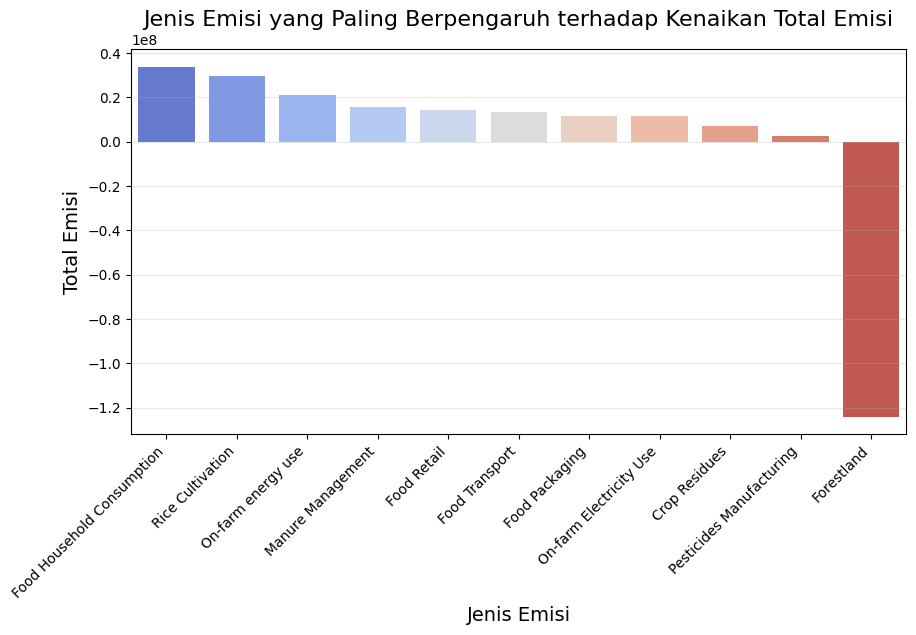

In [58]:
# Daftar kolom emisi yang relevan
emission_columns = [
    'Crop Residues', 'Rice Cultivation', 'Pesticides Manufacturing', 
    'Food Transport', 'Forestland', 'Food Household Consumption', 
    'Food Retail', 'On-farm Electricity Use', 'Food Packaging', 
    'Manure Management', 'On-farm energy use'
]

total_emission_by_type = df[emission_columns].sum().reset_index()
total_emission_by_type.columns = ['Emission Type', 'Total Emission']

total_emission_by_type = total_emission_by_type.sort_values(by='Total Emission', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=total_emission_by_type['Emission Type'], 
    y=total_emission_by_type['Total Emission'], 
    palette='coolwarm'
)
plt.title('Jenis Emisi yang Paling Berpengaruh terhadap Kenaikan Total Emisi', fontsize=16)
plt.xlabel('Jenis Emisi', fontsize=14)
plt.ylabel('Total Emisi', fontsize=14)
plt.xticks(rotation=45, ha='right')  
plt.grid(True, axis='y', alpha=0.3)
plt.show()


Grafik di atas menggambarkan jenis-jenis emisi yang paling berpengaruh terhadap kenaikan total emisi. Berdasarkan hasil analisis, emisi dari Food Household Consumption, Rice Cultivation, dan On-farm Energy Use merupakan penyumbang terbesar terhadap peningkatan total emisi. Hal ini menunjukkan bahwa aktivitas konsumsi pangan rumah tangga dan praktik pertanian, khususnya budidaya padi dan penggunaan energi di lahan pertanian, menjadi sektor yang memerlukan perhatian khusus dalam upaya pengurangan emisi.

Sebaliknya, kategori Forestland menunjukkan dampak negatif terbesar terhadap total emisi. Ini mengindikasikan bahwa perlindungan dan pemulihan lahan hutan berkontribusi signifikan dalam menyerap emisi dan menjadi solusi mitigasi perubahan iklim yang efektif.

Kategori lain, seperti Manure Management, Food Retail, dan Food Transport, memberikan kontribusi yang lebih kecil, tetapi tetap relevan untuk dioptimalkan dalam strategi pengelolaan emisi secara holistik. Temuan ini menyoroti pentingnya pendekatan multi-sektor dalam pengelolaan emisi, dengan fokus utama pada sektor yang memberikan dampak terbesar serta penguatan peran hutan dalam mengurangi emisi global.

# 6. Actionable Insights

## 1. Kenaikan Suhu Global yang Konsisten

### Mapping Kode Area ke Nama Area

In [43]:
area_mapping = {
    0: 'Indonesia',
    40: 'United States',
    80: 'India',
    120: 'Malaysia',
    160: 'Thailand',
    
}

df['Area'] = df['Area_encoded'].map(area_mapping)


Mapping ini berguna untuk mempermudah analisis dan visualisasi, karena nama area lebih mudah dipahami dibandingkan kode area numerik.

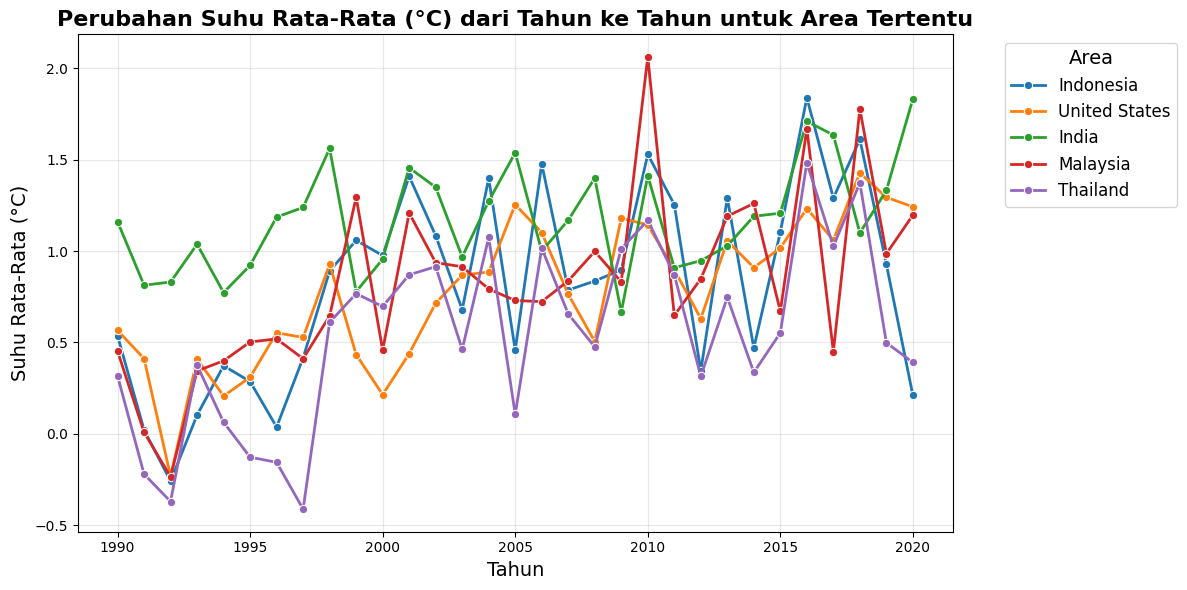

In [44]:
# Filter data negara tertentu
selected_areas = ['Indonesia', 'United States', 'India', 'Malaysia', 'Thailand']
filtered_data = df[df['Area'].isin(selected_areas)]

# Visualisasi tren suhu rata-rata
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=filtered_data,
    x='Year',
    y='Average Temperature °C',
    hue='Area',
    palette='tab10',
    linewidth=2,
    marker='o',
)
plt.title('Perubahan Suhu Rata-Rata (°C) dari Tahun ke Tahun untuk Area Tertentu', fontsize=16, fontweight='bold')
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Suhu Rata-Rata (°C)', fontsize=14)
plt.legend(title='Area', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Visualisasi ini memberikan insight tentang bagaimana perubahan suhu rata-rata terjadi di area tertentu dari waktu ke waktu, dengan representasi warna berbeda untuk tiap area.

#### Grafik ini menampilkan tren perubahan suhu rata-rata dari tahun ke tahun untuk area yang telah difilter, seperti Indonesia, India, dan Malaysia. Perubahan suhu rata-rata menunjukkan tren peningkatan di berbagai negara, termasuk Indonesia, dengan fluktuasi yang bervariasi antar wilayah. Tren ini mencerminkan dampak nyata dari perubahan iklim yang dipengaruhi oleh aktivitas manusia, seperti emisi karbon dari sektor industri dan agrifood. Meskipun tingkat kenaikan suhu berbeda-beda, ancaman terhadap lingkungan bersifat global, menekankan pentingnya upaya mitigasi dan kolaborasi internasional untuk mengurangi emisi karbon dan menjaga kestabilan iklim demi keberlanjutan kehidupan.

### 2. Hubungan Total Emisi CO2 dengan Kenaikan Suhu

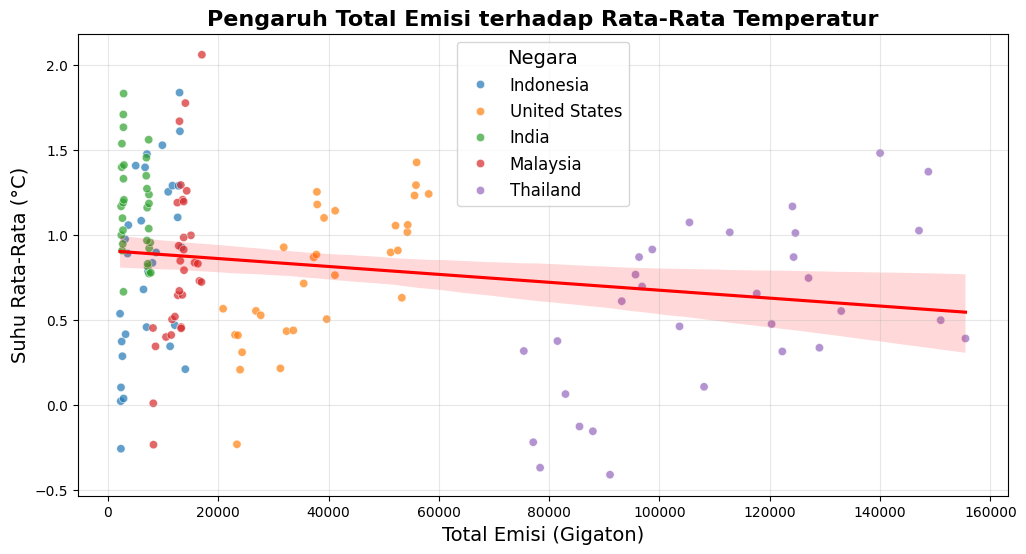

In [45]:
# Visualisasi hubungan total emisi dengan suhu rata-rata
plt.figure(figsize=(12, 6))

# Scatter plot untuk hubungan emisi dan suhu rata-rata
sns.scatterplot(data=filtered_data, x='total_emission', y='Average Temperature °C', 
                hue='Area', alpha=0.7, palette='tab10')

# Regresi linear untuk menunjukkan trendline
sns.regplot(data=filtered_data, x='total_emission', y='Average Temperature °C', 
            scatter=False, color='red', 
            line_kws={'label':'Trendline'})

# Tambahkan judul dan label sumbu
plt.title('Pengaruh Total Emisi terhadap Rata-Rata Temperatur', fontsize=16, fontweight='bold')
plt.xlabel('Total Emisi (Gigaton)', fontsize=14)
plt.ylabel('Suhu Rata-Rata (°C)', fontsize=14)

# Tambahkan legenda
plt.legend(title='Negara', fontsize=12, title_fontsize=14, loc='best')

# Tambahkan grid untuk mempermudah pembacaan
plt.grid(True, alpha=0.3)

# Tampilkan visualisasi
plt.show()


#### Plot ini menunjukkan hubungan antara total emisi karbon dengan perubahan suhu rata-rata untuk beberapa negara/area (Indonesia, United States, India, Malaysia, Thailand). Tujuan visualisasi ini adalah memberikan actionable insight mengenai dampak emisi karbon terhadap suhu rata-rata di area tertentu, memungkinkan pengambilan keputusan berdasarkan data untuk pengurangan emisi karbon dan mitigasi perubahan iklim.

### 3.Analisis Korelasi Jenis Emisi terhadap Total Emisi di Indonesia

Jenis emisi yang paling berpengaruh terhadap kenaikan total emisi di Indonesia:
Manure Management                  0.255273
Food Retail                        0.240080
Manure left on Pasture             0.235437
Agrifood Systems Waste Disposal    0.235362
Food Transport                     0.223956
dtype: float64


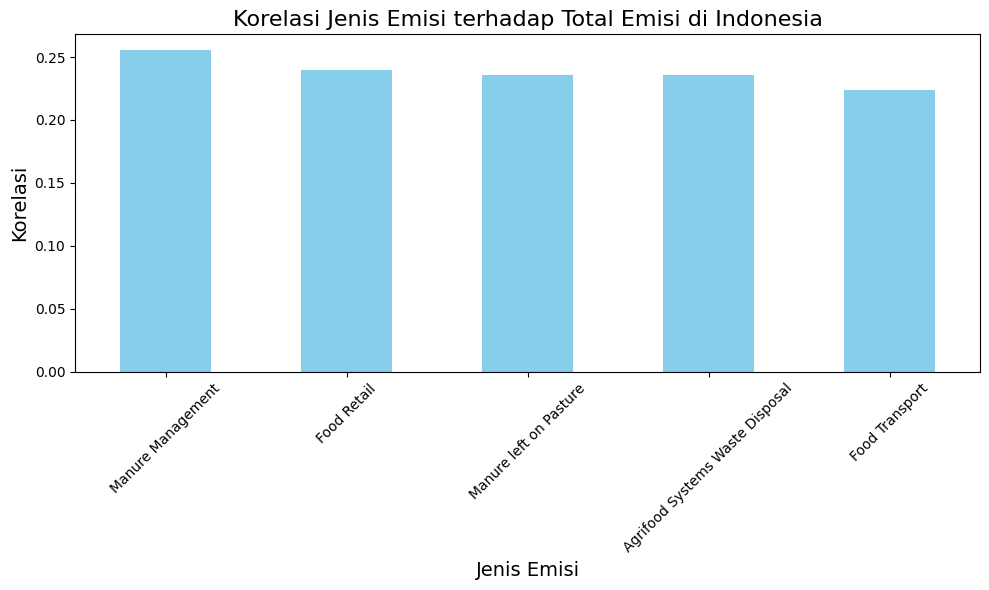

In [46]:
# Pastikan kolom terkait emisi telah difilter dengan benar
emission_columns = [col for col in df.columns if col not in ['Area_encoded', 'Year', 'total_emission', 'Average Temperature °C']]

# Filter data untuk Indonesia
indonesia_data = df[df['Area_encoded'] == 100]  # Ganti 100 dengan kode area Indonesia jika berbeda

# Hitung korelasi jenis emisi dengan total emisi
filtered_emission = indonesia_data[emission_columns].corrwith(indonesia_data['total_emission'])

# Urutkan jenis emisi berdasarkan korelasi terbesar
sorted_emission = filtered_emission.sort_values(ascending=False).head(5)

# Tampilkan hasil
print("Jenis emisi yang paling berpengaruh terhadap kenaikan total emisi di Indonesia:")
print(sorted_emission)

# Visualisasi korelasi jenis emisi dengan total emisi
plt.figure(figsize=(10, 6))
sorted_emission.plot(kind='bar', color='skyblue')
plt.title('Korelasi Jenis Emisi terhadap Total Emisi di Indonesia', fontsize=16)
plt.xlabel('Jenis Emisi', fontsize=14)
plt.ylabel('Korelasi', fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Mengatur ukuran font sumbu X lebih kecil
plt.tight_layout()
plt.show()


#### Kode ini digunakan untuk menganalisis jenis emisi yang memiliki pengaruh terbesar terhadap kenaikan total emisi di Indonesia. Kode ini bertujuan memberikan actionable insights mengenai jenis emisi utama yang perlu menjadi prioritas pengendalian di Indonesia, berdasarkan tingkat pengaruhnya terhadap total emisi karbon. Visualisasi dan analisis ini dapat membantu pembuat kebijakan dalam menetapkan strategi mitigasi perubahan iklim yang lebih efektif.